In [1]:
import numpy as np
import pandas as pd

In [2]:
laptops = pd.read_csv("laptops.csv", encoding="latin-1")
laptops

Manufacturer                                 Model Name  \
0           Apple                                MacBook Pro   
1           Apple                                Macbook Air   
2              HP                                     250 G6   
3           Apple                                MacBook Pro   
4           Apple                                MacBook Pro   
5            Acer                                   Aspire 3   
6           Apple                                MacBook Pro   
7           Apple                                Macbook Air   
8            Asus                            ZenBook UX430UN   
9            Acer                                    Swift 3   
10             HP                                     250 G6   
11             HP                                     250 G6   
12          Apple                                MacBook Pro   
13           Dell                              Inspiron 3567   
14          Apple                                MacBook 12"   
15          Apple                                MacBook Pro   
16           Dell                              Inspiron 3567   
17          Apple                                MacBook Pro   
18         Lenovo                          IdeaPad 320-15IKB   
19           Dell                                     XPS 13   
20           Asus                            Vivobook E200HA   
21         Lenovo                         Legion Y520-15IKBN   
22             HP                                     255 G6   
23           Dell                              Inspiron 5379   
24             HP    15-BS101nv (i7-8550U/8GB/256GB/FHD/W10)   
25           Dell                              Inspiron 3567   
26          Apple                                MacBook Air   
27           Dell                              Inspiron 5570   
28           Dell                              Latitude 5590   
29             HP                                ProBook 470   
...           ...                                        ...   
1273           HP        15-AC110nv (i7-6500U/6GB/1TB/Radeon   
1274         Asus        X553SA-XX031T (N3050/4GB/500GB/W10)   
1275         Asus                       ZenBook UX305CA-UBM1   
1276         Dell                              Inspiron 3567   
1277         Acer                             Aspire ES1-531   
1278         Dell                              Inspiron 3552   
1279       Lenovo                         IdeaPad Y700-15ISK   
1280           HP                        Pavilion 15-AW003nv   
1281         Dell                              Inspiron 3567   
1282           HP                           Stream 11-Y000na   
1283         Asus  X556UJ-XO044T (i7-6500U/4GB/500GB/GeForce   
1284       Lenovo                             Yoga 500-14ISK   
1285       Lenovo                             Yoga 900-13ISK   
1286       Lenovo                         IdeaPad 100S-14IBR   
1287           HP        15-AC110nv (i7-6500U/6GB/1TB/Radeon   
1288         Asus        X553SA-XX031T (N3050/4GB/500GB/W10)   
1289         Asus                       ZenBook UX305CA-UBM1   
1290         Dell                              Inspiron 3567   
1291         Acer                             Aspire ES1-531   
1292         Dell                              Inspiron 3552   
1293       Lenovo                         IdeaPad Y700-15ISK   
1294           HP                        Pavilion 15-AW003nv   
1295         Dell                              Inspiron 3567   
1296           HP                           Stream 11-Y000na   
1297         Asus  X556UJ-XO044T (i7-6500U/4GB/500GB/GeForce   
1298       Lenovo                             Yoga 500-14ISK   
1299       Lenovo                             Yoga 900-13ISK   
1300       Lenovo                         IdeaPad 100S-14IBR   
1301           HP        15-AC110nv (i7-6500U/6GB/1TB/Radeon   
1302         Asus        X553SA-XX031T (N3050/4GB/500GB/W10)   

                Category Screen Size

1/ Redo the cleaning processes as presented in the data cleaning notebook, that include:
- Clean column names

- Convert RAM, Price, Weight into numerical columns (create new columns)

- Extract CPU speed from CPU column

- Correcting values of os column

- Handle missing values of os_version column

2/ Convert Screen Size column in to numeric and use that column to answer:
- What is the popular screen size ?
- What is the minimum screen size of Ultrabook ?
- What is the average screen size of gaming laptop ?

3/ Extract Screen Resolution (for example 2880x1800), and answer:
- How many laptop has full hd (1920x1080) screen ?
- What is the popular screen resolution of Macbook ?

4/ Using column storage to create 3 new columns named: storage_gb, storage_ssd, storage_hdd. storage_gb stores the volume of the storage. storage_ssd indicates whether a storage is ssd; values of storage_ssd is either 0 or 1 where 1 means the storage device is ssd. storage_hdd indicates whether a storage is hdd; values of storage_hdd is either 0 or 1 where 1 means the storage device is hdd. Use this column to answer:
- How many laptop have ssd storage ? How many laptop have hdd storage ?
- On a same plot, plot a histogram for the volume of ssd storage and a histogram for the volume of hdd storage.

# Redo the cleaning processes:
## Clean column names:

In [3]:
laptops.columns

Index(['Manufacturer', 'Model Name', 'Category', 'Screen Size', 'Screen',
       'CPU', 'RAM', ' Storage', 'GPU', 'Operating System',
       'Operating System Version', 'Weight', 'Price (Euros)'],
      dtype='object')

In [4]:
def clean_label(s):
    s = s.strip();
    s = s.replace("Operating System", "os")
    s = s.replace(" ", "_")
    s = s.replace("(", "")
    s = s.replace(")", "")
    s = s.lower()
    return s

In [5]:
new_label = [clean_label(label) for label in laptops.columns]
new_label

['manufacturer',
 'model_name',
 'category',
 'screen_size',
 'screen',
 'cpu',
 'ram',
 'storage',
 'gpu',
 'os',
 'os_version',
 'weight',
 'price_euros']

In [6]:
laptops.columns = new_label

## Convert RAM, Price, Weight into numerical columns (create new columns):

In [7]:
laptops['ram_gb'] = laptops.ram.str.slice(0, -2).astype('int')
laptops["price_euros_num"] = laptops.price_euros.str.replace(",", ".").astype("float")
laptops["weight_kg"] = laptops["weight"].str.replace("kg", "").str.replace("s", "").astype("float")

In [8]:
laptops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 16 columns):
manufacturer       1303 non-null object
model_name         1303 non-null object
category           1303 non-null object
screen_size        1303 non-null object
screen             1303 non-null object
cpu                1303 non-null object
ram                1303 non-null object
storage            1303 non-null object
gpu                1303 non-null object
os                 1303 non-null object
os_version         1133 non-null object
weight             1303 non-null object
price_euros        1303 non-null object
ram_gb             1303 non-null int64
price_euros_num    1303 non-null float64
weight_kg          1303 non-null float64
dtypes: float64(2), int64(1), object(13)
memory usage: 163.0+ KB


## Extract CPU speed from CPU column:

In [9]:
laptops["cpu_speed_ghz"] =  laptops.cpu.str.replace("GHz", "").str.extract(" ([0-9\.]*)$").astype("float")

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.


In [10]:
laptops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 17 columns):
manufacturer       1303 non-null object
model_name         1303 non-null object
category           1303 non-null object
screen_size        1303 non-null object
screen             1303 non-null object
cpu                1303 non-null object
ram                1303 non-null object
storage            1303 non-null object
gpu                1303 non-null object
os                 1303 non-null object
os_version         1133 non-null object
weight             1303 non-null object
price_euros        1303 non-null object
ram_gb             1303 non-null int64
price_euros_num    1303 non-null float64
weight_kg          1303 non-null float64
cpu_speed_ghz      1303 non-null float64
dtypes: float64(3), int64(1), object(13)
memory usage: 173.1+ KB


## Correcting values of os column:

In [11]:
laptops.os.value_counts()

Windows      1125
No OS          66
Linux          62
Chrome OS      27
macOS          13
Mac OS          8
Android         2
Name: os, dtype: int64

In [12]:
mapping = {"Windows": "Windows", "No OS": "No OS", "Linux": "Linux", "Chrome OS": "Chrome OS",
           "macOS": "macOS", "Mac OS": "macOS", "Android": "Android"}
laptops['os_new'] = laptops.os.map(mapping)
laptops.os_new.value_counts()

Windows      1125
No OS          66
Linux          62
Chrome OS      27
macOS          21
Android         2
Name: os_new, dtype: int64

## Handle missing values of os_version column:

In [13]:
laptops.os_version.value_counts(dropna=False)

10      1072
NaN      170
7         45
X          8
10 S       8
Name: os_version, dtype: int64

In [14]:
laptops.loc[laptops.os_version.isnull(), "os"].value_counts()

No OS        66
Linux        62
Chrome OS    27
macOS        13
Android       2
Name: os, dtype: int64

In [15]:
laptops.loc[laptops.os_new == "macOS", "os_version"].value_counts(dropna=False)

NaN    13
X       8
Name: os_version, dtype: int64

In [16]:
laptops.loc[laptops.os_new == "No OS", "os_version"] = "No OS"
laptops.loc[laptops.os_new == "macOS", "os_version"] = "X"
laptops.os_version.value_counts(dropna=False)
laptops.dropna(inplace=True)
laptops.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1212 entries, 0 to 1302
Data columns (total 18 columns):
manufacturer       1212 non-null object
model_name         1212 non-null object
category           1212 non-null object
screen_size        1212 non-null object
screen             1212 non-null object
cpu                1212 non-null object
ram                1212 non-null object
storage            1212 non-null object
gpu                1212 non-null object
os                 1212 non-null object
os_version         1212 non-null object
weight             1212 non-null object
price_euros        1212 non-null object
ram_gb             1212 non-null int64
price_euros_num    1212 non-null float64
weight_kg          1212 non-null float64
cpu_speed_ghz      1212 non-null float64
os_new             1212 non-null object
dtypes: float64(3), int64(1), object(14)
memory usage: 179.9+ KB


# Convert Screen Size column in to numeric and use that column to answer:
## What is the popular screen size ?

In [17]:
laptops["screen_size_num"] = laptops.screen_size.str.replace('"','').astype("float")
laptops["screen_size_num"].value_counts().head(3)

15.6    607
14.0    191
13.3    161
Name: screen_size_num, dtype: int64

## What is the minimum screen size of Ultrabook ?

In [18]:
laptops.loc[laptops["category"]=='Ultrabook','screen_size_num'].min()

11.6

## What is the average screen size of gaming laptop ?

In [19]:
laptops.loc[laptops["category"]=='Gaming','screen_size_num'].mean()

16.35223880597015

# Extract Screen Resolution (for example 2880x1800), and answer:

In [20]:
laptops["screen_resolution"] = laptops.screen.str.extract("([0-9]+x[0-9]+)", expand=False)
laptops["screen_resolution"].value_counts()

1920x1080    806
1366x768     260
3840x2160     43
3200x1800     25
2560x1440     23
1600x900      23
2560x1600      6
2256x1504      6
2304x1440      6
2880x1800      4
1440x900       4
1920x1200      3
2160x1440      2
2736x1824      1
Name: screen_resolution, dtype: int64

## How many laptop has Full HD (1920x1080) screen ?

In [21]:
(laptops.screen_resolution=='1920x1080').sum()

806

## What is the popular screen resolution of Macbook ?

In [22]:
laptops.loc[laptops["manufacturer"]=='Apple','screen_resolution'].value_counts().head(3)

2304x1440    6
2560x1600    6
2880x1800    4
Name: screen_resolution, dtype: int64

# Extract storage data:

In [23]:
laptops["storage"].value_counts()

256GB SSD                        396
1TB HDD                          193
500GB HDD                        121
512GB SSD                        117
128GB SSD +  1TB HDD              92
128GB SSD                         73
256GB SSD +  1TB HDD              73
32GB Flash Storage                28
2TB HDD                           16
512GB SSD +  1TB HDD              14
1TB SSD                           14
64GB Flash Storage                10
256GB SSD +  2TB HDD               9
1TB Hybrid                         9
256GB Flash Storage                8
32GB SSD                           5
1GB SSD                            5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
256GB SSD +  256GB SSD             2
128GB SSD +  2TB HDD               2
512GB Flash Storage                2
64GB SSD                           1
128GB HDD                          1
1TB HDD +  1TB HDD                 1
5

In [24]:
def check_ssd(s):
    return int(("SSD" in s) or ("Flash" in s) or ("Hybrid" in s))

laptops["storage_ssd"] = laptops.apply((lambda row: check_ssd(row['storage'])), axis=1)

In [25]:
def check_hdd(s):
    return int("HDD" in s)

laptops["storage_hdd"] = laptops.apply((lambda row: check_hdd(row['storage'])), axis=1)

## How many laptop have SSD Storage ?

In [26]:
laptops["storage_ssd"].sum()

879

## How many laptop have HDD Storage ?

In [27]:
laptops["storage_hdd"].sum()

531

## Extract SSD and HDD Storage Volume:

In [28]:
import re
def get_volume_hdd_gb(s):
    s = s.replace(" ","")
    s = re.sub(r"(-*[0-9,\.]+)(GB|TB)(SSD|FlashStorage|Hybrid)","0",s)
    s = s.replace("TB","*1024GB")
    exp = list(re.findall(r'(-*[0-9,\.]+)|([*+^\/-]+)', s))
    exp = [tuple(j for j in i if j)[-1] for i in exp]
    try:
        return eval(''.join(exp))
    except:
        return 0

def get_volume_ssd_gb(s):
    s = s.replace(" ","")
    s = re.sub(r"(-*[0-9,\.]+)(GB|TB)(HDD)","0",s)
    s = s.replace("TB","*1024GB")
    exp = list(re.findall(r'(-*[0-9,\.]+)|([*+^\/-]+)', s))
    exp = [tuple(j for j in i if j)[-1] for i in exp]
    try:
        return eval(''.join(exp))
    except:
        return 0

In [29]:
laptops["volume_ssd_gb"] = 0
laptops["volume_hdd_gb"] = 0
laptops["volume_hdd_gb"] = laptops.apply((lambda row: get_volume_hdd_gb(row['storage'])), axis=1)
laptops["volume_ssd_gb"] = laptops.apply((lambda row: get_volume_ssd_gb(row['storage'])), axis=1)

In [30]:
laptops[["storage","storage_ssd","storage_hdd","volume_ssd_gb","volume_hdd_gb"]]

storage  storage_ssd  storage_hdd  volume_ssd_gb  \
0                  128GB SSD            1            0            128   
1        128GB Flash Storage            1            0            128   
2                  256GB SSD            1            0            256   
3                  512GB SSD            1            0            512   
4                  256GB SSD            1            0            256   
5                  500GB HDD            0            1              0   
6        256GB Flash Storage            1            0            256   
7        256GB Flash Storage            1            0            256   
8                  512GB SSD            1            0            512   
9                  256GB SSD            1            0            256   
10                 500GB HDD            0            1              0   
11                 500GB HDD            0            1              0   
12                 256GB SSD            1            0            256   
13                 256GB SSD            1            0            256   
14                 256GB SSD            1            0            256   
15                 256GB SSD            1            0            256   
16                 256GB SSD            1            0            256   
17                 512GB SSD            1            0            512   
18                   1TB HDD            0            1              0   
19                 128GB SSD            1            0            128   
20        32GB Flash Storage            1            0             32   
21      128GB SSD +  1TB HDD            1            1            128   
22                 500GB HDD            0            1              0   
23                 256GB SSD            1            0            256   
24                 256GB SSD            1            0            256   
25                   1TB HDD            0            1              0   
26       128GB Flash Storage            1            0            128   
27                 256GB SSD            1            0            256   
28    256GB SSD +  256GB SSD            1            0            512   
29                   1TB HDD            0            1              0   
...                      ...          ...          ...            ...   
1269               500GB HDD            0            1              0   
1270               128GB SSD            1            0            128   
1271               512GB SSD            1            0            512   
1272      64GB Flash Storage            1            0             64   
1273                 1TB HDD            0            1              0   
1274               500GB HDD            0            1              0   
1275               512GB SSD            1            0            512   
1276                 1TB HDD            0            1              0   
1278               500GB HDD            0            1              0   
1279                 1TB HDD            0            1              0   
1280              1TB Hybrid            1            0           1024   
1282      32GB Flash Storage            1            0             32   
1283               500GB HDD            0            1              0   
1284               128GB SSD            1            0            128   
1285               512GB SSD            1            0            512   
1286      64GB Flash Storage            1            0             64   
1287                 1TB HDD            0            1              0   
1288               500GB HDD            0            1              0   
1289               512GB SSD            1            0            512   
1290                 1TB HDD            0            1              0   
1292               500GB HDD            0            1              0   
1293                 1TB HDD            0            1              0   
1294              1TB Hybrid            1            0           1024   
1296  

## Plot a histogram for the volume of SSD storage and a histogram for the volume of HDD storage:

In [31]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = [8, 6]

In [32]:
laptops.volume_ssd_gb.hist(bins=25, label='volume_ssd_gb')
plt.legend()

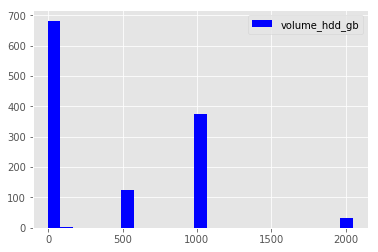

In [33]:
laptops.volume_hdd_gb.hist(bins=25, color='blue', label='volume_hdd_gb')
plt.legend()

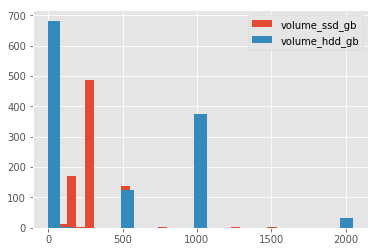

In [34]:
laptops.volume_ssd_gb.hist(bins=25, label='volume_ssd_gb')
laptops.volume_hdd_gb.hist(bins=25, label='volume_hdd_gb')
plt.legend()